# 앙상블 기법

------

앙상블 기법은 머신러닝에서 여러 개의 모델을 조합하여 더 나은 예측 성능을 도출하는 기법을 의미한다. 

앞에서 학습한 트리 모형만으로는 예측력이 떨어지기 때문에 일련의 트리들을 종합하여 더 나은 방법을 모색할 수 있다.

예를 들어, 생성된 트리들을 바탕으로 투표 방법과 다수결 원칙을 이용하여 예측하는 방법이 있다.

여러 개의 예측기로부터 예측을 종합하여 더 좋은 예측을 얻는 방법인 앙상블 학습 (ensemble learning)을 이용하는 것이다.

먼저 트리 모델을 통해 앙상블 기법들을 살펴볼 것이지만, 앙상블 학습은 트리 뿐만이 아닌 다른 머신 러닝 기법에도 이용된다.

앙상블 방법은 개별 모델의 한계를 보완하고, 과적합을 방지하며, 전반적인 모델 성능을 향상시킬 수 있다. 

앙상블 기법은 앙상블에 이용하는 분류기들이 독립적일 경우 더 효과가 높다.

주요한 앙상블 기법로 크게 배깅과 부스팅으로 구분할 수 있다. 

또한 간단한 투표 알고리즘 또한 앙상블 기법으로 볼 수 있다.

## Voting

투표 앙상블 방법은 우리가 주요하게 살펴볼 내용은 아니지만, 앙상블 방법에 대한 대략적인 직관을 설명할 수 있기에 간단히 살펴보도록 한다.

#### [`sklearn.ensemble.VotingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

`sklearn.ensemble.VotingClassifier`는 다양한 분류 모델들의 예측 결과를 결합하여 최종 예측값을 도출하는 ensemble 방법을 구현하였다.

이 방법론은 각 분류 모델의 예측값들을 투표하여 다수결 원칙에 따라 최종 예측값을 도출한다. 

이때, 각 분류 모델들이 동등하게 기여할 수 있도록 각 모델의 가중치를 조정할 수 있다.

`sklearn.ensemble.VotingClassifier`는 hard voting과 soft voting 방식을 지원한다. 

hard voting은 다수결 원칙에 따라 가장 많이 선택된 클래스를 최종 예측값으로 선택하며, soft voting은 각 클래스에 대한 확률 예측값을 평균내어 가장 높은 확률값을 가지는 클래스를 선택한다.

[`sklearn.datasets.makes_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) 데이터를 이용하여 간단한 예제를 진행해 보자.

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30)
X_train, X_test, y_train, y_test = train_test_split(X, y)

앙상블 방법에 대해 간단히 살펴보기 위해, 몇 가지 분류기들을 정의하여 살펴보자.

이전에 공부했던 [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [`GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), [`QuadratciDiscriminatAnalysis`](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html), [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) 들을 활용해 보자.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

lr = LogisticRegression()
tclf = DecisionTreeClassifier()
gnb = GaussianNB()
qda = QuadraticDiscriminantAnalysis()

[`sklearn.ensemble.VotingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)는 몇 가지 분류기를 리스트로 입력받아, 투표를 하는 데에 활용된다.

`estimators`의 입력 인자로서 `(str, estimator)`로 구성된 tuple들의 리스트를 전달한다.
- `str`은 문자열로서 적절한 이름
- `estimator`는 활용할 모형

In [4]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('log_reg', lr), ('tree', tclf), ('gauss_nb', gnb), ('quadratic', qda)], voting='hard')
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg', LogisticRegression()),
                             ('tree', DecisionTreeClassifier()),
                             ('gauss_nb', GaussianNB()),
                             ('quadratic', QuadraticDiscriminantAnalysis())])

[`sklearn.metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)를 통해 분류 정확도를 측정해 보자.

In [5]:
from sklearn.metrics import accuracy_score
y_pred = eclf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.848


[`sklearn.inspection.DecisionBoundaryDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html)를 이용하여 경계선을 보다 쉽게 그릴 수 있다.

[`.from_estimator()`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay.from_estimator) method를 통하여 그림을 그리며 훈련된 분류기를 전달한다.

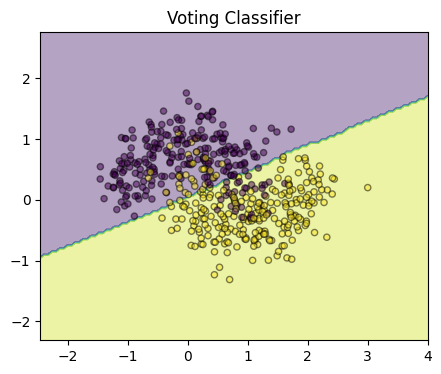

In [6]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

_, ax = plt.subplots(1, 1, sharex="col", sharey="row", figsize=(5,4))

DecisionBoundaryDisplay.from_estimator(
    eclf, X = X, alpha=0.4, ax=ax, response_method="predict"
)
ax.scatter(X[:, 0], X[:, 1], c = y, s = 20, edgecolor="k", alpha=0.5)
ax.set_title("Voting Classifier")
plt.show()

각 개별 분류기의 성능을 살펴보자. 거의 비슷비슷하다.

In [7]:
lr.fit(X_train, y_train).score(X_test, y_test)

0.848

In [8]:
tclf.fit(X_train, y_train).score(X_test, y_test)

0.848

In [9]:
gnb.fit(X_train, y_train).score(X_test, y_test)

0.848

In [10]:
qda.fit(X_train, y_train).score(X_test, y_test)

0.848

Voting 알고리즘의 경우 다양한 분류 알고리즘을 적용할 경우 높은 예측 성능을 보일 수도 있지만, 각 분류 알고리즘의 예측 결과가 비슷하게 나오는 경우에는 개별 방법에 비해, 특별한 성능 향상이 없을 수도 있다.

또한, 가중치가 없는 voting 알고리즘의 경우, 한 두개의 저성능 모델이 앙상블 방법의 성능 전체를 저하시킬 수도 있다.

그리고 하나의 머신 러닝 방법이 다른 방법들보다 뚜렷히 좋은 성능을 보일 경우, 앙상블 방법보다는 좋은 성능을 가지는 머신 러닝 방법을 사용하는 것이 나을 수 있다.

반면, voting 방법은 여러 학습기의 결과를 평균내는 개념이기 때문에, 적은 분산을 제공하며, 이에 따라 전반적인 성능을 향상시킬 수도 있다.

따라서 voting 방법을 사용하기 위해서는 다양한 테스트를 거쳐 다음을 확인해 보는 것이 좋다.

* 투표 방법이 앙상블 방법에 사용된 각 개별 방법보다 좋은 성능을 발휘하고 있는가.
* 투표 방법의 결과가 적은 분산을 나타내는가.

이후로는 트리 모형을 기반으로 하여 보다 구체적인 앙상블 방법들에 대해 알아본다.

## Bagging

배깅 (bagging)은 bootstrap aggregation이라고도 불리우며 통계 학습에서 분산을 줄이기 위해 사용하는 일반적인 방법이다.

머신러닝 앙상블 방법에서는 학습 데이터 집합을 여러 개의 샘플로 부트스트랩하여, 각 샘플에 서로 다른 모델들을 학습시켜 예측 결과를 결합함으로써 전체적인 예측 성능을 향상시킨다. 

이를 통해 모델의 성능을 향상시키고, 과적합 문제를 줄일 수 있다.

여러 확률변수들을 평균내는 과정을 거치면 분산은 줄어들게 되는데 배깅도 이 원리에 기반한다.

- 예를 들어, 하나의 모델이 노이즈에 민감하게 반응해 예측이 요동친다고 해도, 여러 모델의 예측을 평균내면 이런 요동이 상쇄되어 더 안정적인 예측이 가능하다. 

우리는 트리들을 bagging한 모형을 살펴볼 것이다.

- 결정 트리(decision tree), 특히, full-grown tree는 일반적으로 분산(variance)이 높은 모델로 과적합이 잘 일어나나, 반대로 다양한 bootstrap 샘플에 대해 각기 다른 모델로 적합되기 적절하다.

- Bagging은 모델의 분산을 줄여주는 특징이 있으므로, 높은 분산을 가지는 모델(full-grown tree 등)을 base estimator로 하여, 평균인나 투표를 통해 과적합의 영향을 줄이는 역할을 한다.

먼저 bootstrap의 내용을 복습해 본다.

### Bootstrap

Bootstrap은 통계학에서 estimator의 정확성을 측정하는데 사용할 수 있는 유연하고 강력한 방법이다.

- 원래의 데이터에서 중복을 허용하여 여러 개의 새로운 표본 데이터를 무작위로 생성하는 방법

추정량의 표준오차나 신뢰구간을 계산하는 데에 사용할 수 있다.

만약 모집단의 분포를 이미 알고 있다면 시뮬레이션 방법을 통해 샘플을 계속 생성할 수 있지만 그렇지 않을 경우 Bootstrap을 이용하여 주어진 샘플을 다시 resampling하여 새로운 샘플을 만드는 과정을 취할 수 있다.

* sampling with replacement

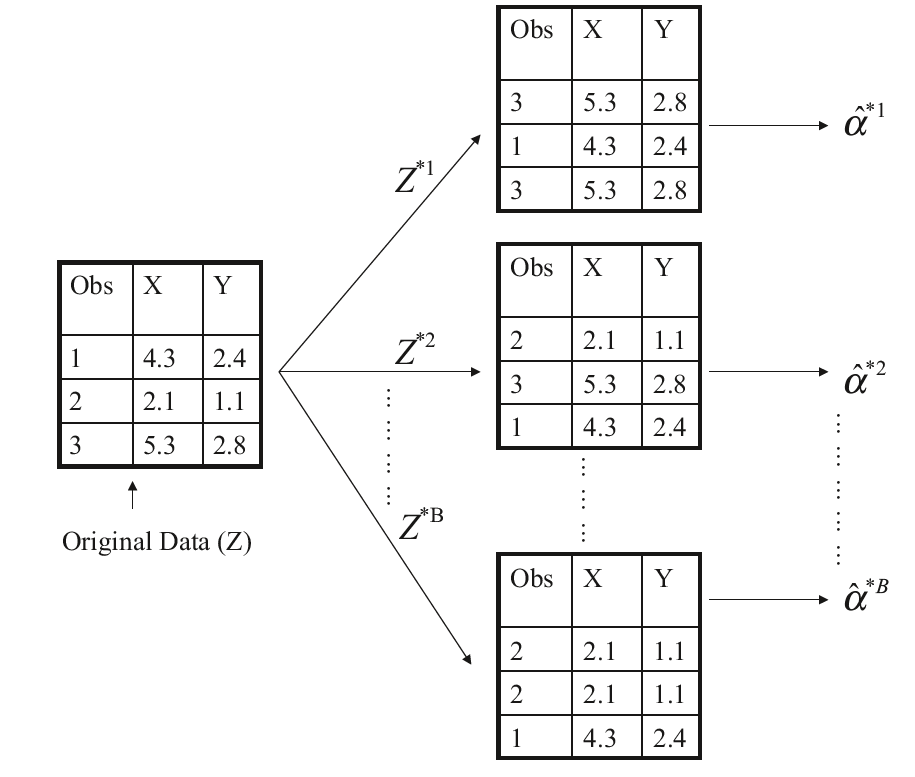

위 그림은 관찰값이 3개 있을 경우 bootstrap 방법에 대해 나타낸다.

3개의 관찰값을 중복 허용의 랜덤 샘플링하여 3개를 뽑아 새로운 데이터셋을 만들고 이를 이용하여 모수를 추정한다.

모수 $\alpha$에 대한 추정치는 각 bootstrap 단계인 $Z^{*r}$마다 계산할 수 있다. 이를 $\hat \alpha^{*r}$라 하자.

이를 $B$번 반복하여, $\hat \alpha^{*r}$들의 표본평균인 $\overline{ \hat \alpha^{*}} $를 bootstrap 추정량으로 삼는다.

Bootstrap 방법에 의한 $\alpha$의 추정량의 표준오차는 다음으로 추정한다.

$$ \mathrm{SE}_B (\hat \alpha) = \sqrt{\frac{1}{B-1} \sum_{r=1}^{B} \left( \hat \alpha^{*r} - \overline{ \hat \alpha^{*}} \right)^2} $$

#### Bagging의 기본 원리와 예측 방법

다시 Bagging의 내용으로 돌아가서, $B$개의 서로 다른 bootstrap 훈련 데이터 셋을 만들었다고 하자.

예를 들어, Regression 문제에 대해 $b$-번째 bootstrap된 훈련 데이터를 이용하여 $\hat f^{*b}$의 적합 모형을 얻었다고 하자.

그러면 $x$에서의 예측은 다음과 같이 얻을 수 있다.

$$ \hat f_{\mathrm{bag}}(x) = \frac{1}{B} \sum_{b=1}^{B} \hat f^{*b}(x) $$

이를 bagging이라 한다.

Classification 문제의 경우 평균을 낼 수 없으므로, 다수결 (majority vote) 개념을 이용한다.

즉, 여러 개의 분류기 $\hat f^{*b}(x)$의 예측값들 중 가장 많은 표를 획득한 클래스가 예측값이 된다.

### 예제

[`sklearn.datasets.load_breast_cancer`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)를 이용한 분류 문제

먼저 트리 하나를 이용하여 모형을 훈련하여 본다.

In [20]:
from sklearn import datasets
raw_cancer = datasets.load_breast_cancer()

In [21]:
X, y = raw_cancer.data, raw_cancer.target

In [22]:
import pandas as pd
pd.DataFrame(X, columns = raw_cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

[`DecisionTreeClassifier.score(X_test, y_test)`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.score) : 주어진 테스트 데이터에 대해 accuracy를 반환

In [24]:
# 트리 하나를 이용
from sklearn.tree import DecisionTreeClassifier
base_tree = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
base_tree.score(X_test, y_test)

0.9370629370629371

In [25]:
from sklearn import tree 

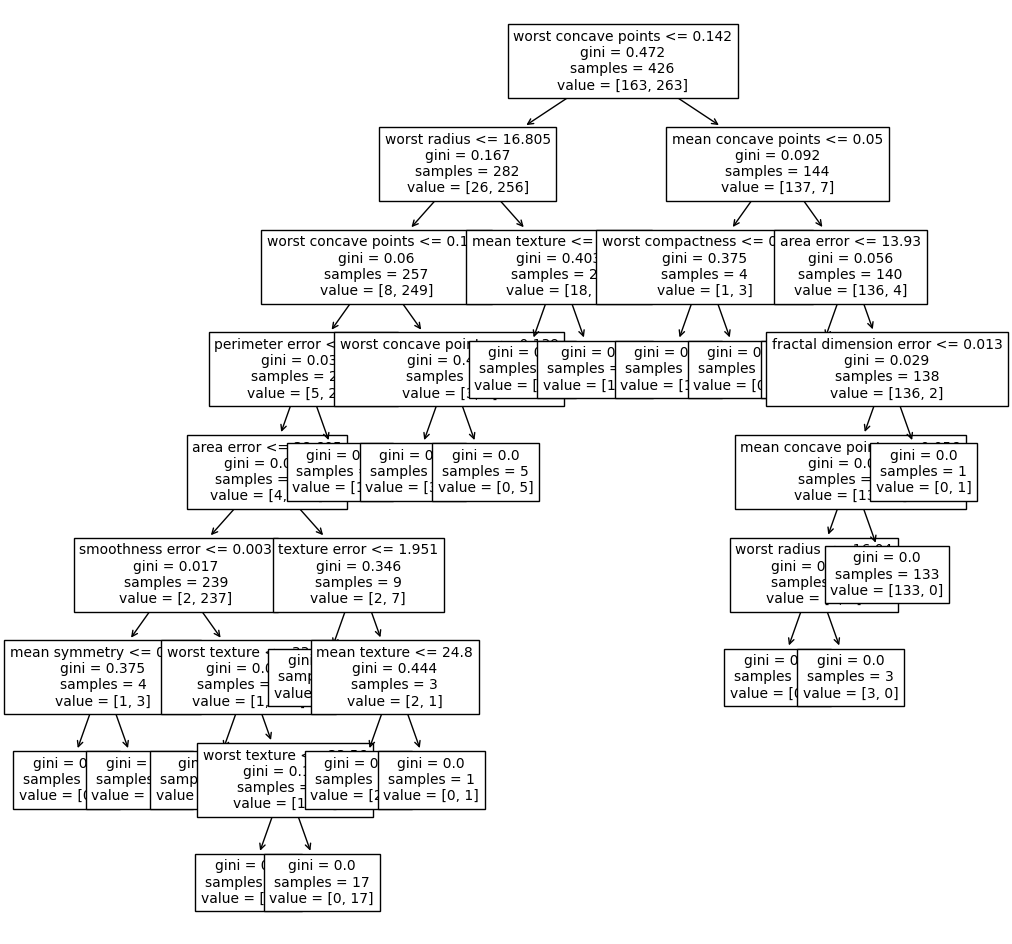

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(base_tree, fontsize=10, feature_names=raw_cancer['feature_names'].tolist())
plt.show()

#### [```sklearn.ensemble.BaggingClassifier```](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

Scikit-learn에서 분류 문제에 bagging을 사용하는 방법.

각각의 bootstrap 샘플링된 데이터셋에서 학습된 base learner들을 결합하여 strong learner를 만드는 방법으로, default로 decision Tree를 사용하나 다른 분류기도 가능하다.


* ```base_estimator``` : 기본 추정기, `None`이면 기본 추정기는 DecisionTreeClassifier.
   * Tree를 이용할 시, 일반적으로 가지치기를 하지 않은 full tree를 이용한다.
* ```n_estimators``` : ensemble에 사용할 기본 추정기의 숫자.  default=10
* `max_samples` : 각 부트스트랩에서 뽑아내는 샘플의 수. default=1.0 (100%)
* ```oob_score``` :  out-of-bag error를 추정할 것인지 결정하는 boolean 값.

Tree의 숫자 10개를 이용한 bagging

In [30]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1).fit(X_train,y_train)

`.score()` method를 이용하여 accuracy 측정

In [31]:
clf.score(X_test, y_test)

0.972027972027972

Tree의 숫자 20개

In [32]:
BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1, n_estimators=20)\
.fit(X_train,y_train).score(X_test, y_test)

0.951048951048951

Tree의 숫자 50개

In [33]:
BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1, n_estimators=50)\
.fit(X_train,y_train).score(X_test, y_test)

0.9790209790209791

### Out-of-bag error

Bagging은 test 에러 혹은 test 성능을 추정할 수 있는 독특한 방법이 있다.

Bootstrap은 중복 추출이라 이 과정에서 일부의 데이터 (대략 2/3)는 자연스럽게 훈련 데이터가 되고 나머지는 훈련에 사용하지 않게 된다.

따라서 훈련에 사용되지 않은 out-of-bag (OOB) 데이터를 이용해 테스트 성능을 시험해 볼 수 있다.

관찰값 입장에서 보면 $i$번째 관찰값은 대략 B/3회 정도 테스트에 참여하게 된다.

- $i$번째 관찰값은 각 bootstrap 샘플에 포함되지 않을 확률이 약 $1 - \left(1 - \frac{1}{n}\right)^n \approx \frac{1}{3}$ 이므로, 전체 $B$개의 모델 중 약 $B/3$개에서 OOB 테스트에 사용된다.

예를 들어, classification의 경우 테스트에 참여한 관찰값들의 다수결 투표를 통하여 예측값을 정하고, 실제 $y$값과 비교하여 테스트 에러를 추정할 수 있다.

정리하면 다음과 같다.

* 원 데이터로부터 $B$번 부트스트랩 샘플링을 하여, 각, 부트스트랩 샘플에 트리를 적합한다. (총 $B$개의 트리 생성됨)
* 각 관찰값에 대해 해당 관찰값이 훈련에 포함되지 않은 모델들만 이용하여, 예측을 진행한다.
* 이 과정을 거치게 되면, 원 데이터의 하나의 샘플 당 여러 번의 out-of-bag 예측이 이루어질 수 있는데, 분류 문제의 경우 투표, 회귀는 평균을 취하여 예측값을 정한다.
* 이 예측값과 실제 $y$값과 비교한다.
* 모든 관찰값에 대해 적용하여 에러를 추정한다.

OOB error를 이용하여 테스트 에러를 추정할 경우, cross-validation이나 validation set approach를 수행하지 않아도 될 수 있다.

| Tree # | Bootstrap Sample (학습 데이터) | OOB Sample (테스트에 사용) |
| ------ | ------------------------- | -------------------- |
| Tree 1 | 1, 2, 5, 6, 8, 8, 9       | 3, 4, 7, 10          |
| Tree 2 | 2, 3, 3, 6, 7, 8, 10      | 1, 4, 5, 9           |
| Tree 3 | 1, 1, 2, 4, 5, 6, 9       | 3, 7, 8, 10          |
| Tree 4 | 3, 4, 4, 7, 8, 9, 10      | 1, 2, 5, 6        
- 예를 들어 위와 같은 상황에서 1번 데이터는 Tree 2와 Tree 4에서 훈련에 참여하지 않았으므로, 훈련된 Tree 2와 Tree 4로 예측을 진행하여, 투표나 평균을 취한다.

- 이 예측값을 실제 $y_1$값과 비교한다.
  
- 비슷하게 2번 데이터는 Tree 4에 대해 예측을 진행하고, 3, 4, ..., 10번 데이터에 대해 동일한 방법을 적용한다.

- 모든 관찰값에 대해 예측 진행 후 에러를 계산한다.   |


#### OOB vs K-fold Cross-Validation

* OOB Error

  * Bagging 과정 내에서 자동으로 얻을 수 있음
  * 별도의 검증 세트를 만들 필요 없어, 계산 효율적
  * 성능의 대략적인 추정을 빠르게 얻을 수 있음
* K-Fold CV

  * 일반적으로 더 정밀한 성능 평가 가능
  * 모델 재학습을 여러 번 수행해야 하므로 계산 비용이 높음
  * Bagging 외의 모델 평가에 일반적으로 사용됨

#### OOB 에러 계산

위에서 언급한 out-of-bag error를 계산하기 위해서는 `oob_score = True`로 설정한다.

이 때는 training과 test셋을 따로 구분할 필요없이 전체를 훈련을 위한 `.fit()`의 인자로 전달한다.

계산된 값은 `oob_score_`를 통해 확인하는데, out-of-bag sample을 통해 정확하게 분류된 비율을 뜻한다.

- OOB error을 계산하려면 `1-oob_score_`를 계산

In [34]:
bc = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1, n_estimators=20, oob_score = True).fit(X,y)
bc.oob_score_

0.9525483304042179

아래 코드에서 `.estimators_samples_`는 BaggingClassifier의 Bootstrap으로 선택된 훈련 샘플들의 인덱스 리스트이다.

또한 `.estimators_`는 훈련된 트리들을 담고 있기 때문에, 이를 이용하여 `oob_score_`를 계산하는 과정을 재현해 볼 수 있다.

In [35]:
import numpy as np

ys_pred = np.full((X.shape[0], bc.n_estimators), np.nan)

for i, train_idxs in enumerate(bc.estimators_samples_):
    
    oob_idxs = np.setdiff1d(np.arange(X.shape[0]), train_idxs)  # OOB 셋들의 인덱스 구하기
        
    X_oob = X[oob_idxs]
    
    y_pred_i = bc.estimators_[i].predict(X_oob)  # 훈련된 트리로 예측
    
    ys_pred[oob_idxs, i] = y_pred_i # 추후에 다수결 결정을 내기 위해 저장

아래 표에서 행은 각 데이터의 index를 나타내고, 열들은 각 bootstrap의 회차를 나타낸다.
- 총 20회의 bootstrap을 통해, 새로운 데이터 셋이 형성되었고, 각 데이터 셋에 대해 tree를 적합한 후, 훈련에 참여하지 않은 OOB 데이터에 대해서만 예측을 진행하였다.

- 즉, 행은 데이터 번호이고, 열은 Tree 번호라고 생각하면 된다.

In [36]:
pd.DataFrame(ys_pred)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
1,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
2,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN
3,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0
4,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
565,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN
566,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0
567,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0


이 결과를 통해, 이제 oob score를 직접 계산해 보자.

In [37]:
y_pred_oob = []
for row in ys_pred:
    row_no_nan = row[~np.isnan(row)].astype(int)  # nan을 제외한 값들로 이루어진 배열
    y_pred_oob.append(np.bincount(row_no_nan).argmax()) # 가장 많이 등장한 클래스 결정

accuracy_score(y, y_pred_oob)

0.9525483304042179

`BaggingClassifier`에서 제공하는 `oob_score_`와 동일하다.

In [38]:
BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1, n_estimators=50, oob_score = True).fit(X,y).oob_score_

0.9525483304042179

#### 다른 base estimator를 이용한 bagging

다른 base estimator를 이용한 bagging도 가능하다. 아래 코드에서는 간단히 로지스틱 회귀를 base estimator로 사용하였다. 

In [39]:
from sklearn.linear_model import LogisticRegression
BaggingClassifier(LogisticRegression(solver='liblinear'), n_estimators=50, oob_score=True, random_state=1).fit(X,y).oob_score_

0.9507908611599297

#### 실제 데이터를 이용한 예제 

[Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) 데이터를 이용하여 `cnt`를 예측하는 regression 예제

In [40]:
import pandas as pd
url = "https://media.githubusercontent.com/media/PacktPublishing/Hands-On-Gradient-Boosting-with-XGBoost-and-Scikit-learn/master/Chapter01/bike_rentals_cleaned.csv"
df = pd.read_csv(url)
df

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1.0,1.0,12,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,2114
727,728,1.0,1.0,12,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,3095
728,729,1.0,1.0,12,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,1341
729,730,1.0,1.0,12,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,1796


In [41]:
X = df.loc[:,"season":"windspeed"]
y = df.loc[:,"cnt"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

[`sklearn.ensemble.BaggingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html)로 regressor들을 bagging하여 만들어 보자.  

이용할 base estimator는 `DecisionTreeRegressor`이다.

In [43]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [44]:
DecisionTreeRegressor(random_state=1).fit(X_train, y_train).score(X_test, y_test)

0.6742766782080538

`n_estimator`의 값을 조정하여 weak learner들의 숫자, 즉, 몇 번 bootstrap할 것인지 정한다.

[`.score()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor.score) method는 [`sklearn.metrics.r2_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) 함수를 사용하여 회귀 모델의 결정 계수(R-squared)를 계산한다.

R-squared는 회귀 모델의 적합도를 나타내는 지표로, 최대 1까지의 값을 가지며 높을수록 모델이 데이터에 더 잘 적합되었다는 의미이다.

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{\text{true}}^{(i)} - y_{\text{pred}}^{(i)})^2}{\sum_{i=1}^{n} (y_{\text{true}}^{(i)} - \bar{y}_{\text{true}})^2} $$

In [45]:
br1 = BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=1, n_estimators=1).fit(X_train, y_train)
br1.score(X_test, y_test)

0.6878266786748435

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test, br1.predict(X_test))

0.6878266786748435

In [47]:
BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=1, n_estimators=5)\
.fit(X_train, y_train).score(X_test, y_test)

0.8064553047927325

In [48]:
BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=1, n_estimators=10)\
.fit(X_train, y_train).score(X_test, y_test)

0.8148809175426628

In [49]:
BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=1, n_estimators=50)\
.fit(X_train, y_train).score(X_test, y_test)

0.8277392650405595

`BagginRegressor`는 `oob_score_`를 계산하는데 있어 마찬가지로 $R^2$를 이용한다.

분류 문제와 마찬가지로 각 부트스트랩별  OOB sample에 대해 적합된 트리로 $y$의 예측값을 계산하고, 여러 개 있을 경우, 평균을 취한다.

이렇게 계산된 예측값과 실제 $y$값으로 $R^2$를 계산한다.  

In [54]:
br = BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=1, n_estimators=20, oob_score = True).fit(X, y)
br.oob_score_

0.8701892077807885

분류 문제와 비슷하게 `.estimators_samples_`는 BaggingRegressor의 Bootstrap으로 선택된 훈련 샘플들의 인덱스 리스트이다.

또한 `.estimators_`는 훈련된 트리들을 담고 있기 때문에, 이를 이용하여 `oob_score_`를 계산하는 과정을 재현해 볼 수 있다.

In [56]:
import numpy as np

ys_pred = np.full((X.shape[0], br.n_estimators), np.nan)


for i, train_idxs in enumerate(br.estimators_samples_):
    
    oob_idxs = np.setdiff1d(np.arange(X.shape[0]), train_idxs)  # OOB 셋들의 인덱스 구하기
        
    X_oob = X.loc[oob_idxs].values
    
    y_pred_i = br.estimators_[i].predict(X_oob)  # 훈련된 트리로 예측
    
    ys_pred[oob_idxs, i] = y_pred_i # 추후에 평균을 내기 위해 저장
    
    
pd.DataFrame(ys_pred)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,1650.0,NaN,NaN,NaN,NaN,1807.0,NaN,NaN,1011.0,2192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2077.0,801.0
1,NaN,NaN,985.0,NaN,985.0,NaN,1446.0,NaN,985.0,NaN,2402.0,NaN,985.0,985.0,1795.0,NaN,NaN,NaN,754.0,NaN
2,1501.0,NaN,1562.0,1501.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1321.0,1600.0,NaN,NaN,NaN,1501.0,NaN,NaN
3,1606.0,1927.0,NaN,1600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985.0,1263.0,1600.0,NaN,NaN,NaN,NaN,NaN,1416.0
4,1606.0,NaN,NaN,NaN,NaN,1606.0,NaN,NaN,NaN,NaN,NaN,1650.0,1606.0,NaN,NaN,1815.0,NaN,NaN,1985.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1749.0,NaN,1796.0,NaN,NaN,NaN,1796.0,1796.0,5375.0,NaN,NaN,3333.0,NaN,2802.0,NaN,2689.0,3956.0,NaN,3292.0,3333.0
727,NaN,NaN,NaN,NaN,NaN,NaN,1341.0,2729.0,5375.0,NaN,1787.0,2376.0,NaN,2802.0,NaN,2729.0,3956.0,3272.0,NaN,NaN
728,NaN,NaN,2832.0,1013.0,NaN,441.0,NaN,NaN,NaN,2493.0,NaN,2729.0,NaN,NaN,NaN,2832.0,NaN,NaN,2298.0,NaN
729,1749.0,NaN,NaN,NaN,NaN,1749.0,NaN,NaN,NaN,NaN,2114.0,2277.0,3956.0,NaN,2689.0,3214.0,3956.0,2114.0,NaN,NaN


In [57]:
y_pred_oob = np.nanmean(ys_pred, axis=1)
r2_score(y, y_pred_oob)  

0.8701892077807885

In [58]:
BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=1, n_estimators=50, oob_score = True).fit(X, y).oob_score_

0.8778193144433839